# Decision Tree (의사결정나무 - 결정 트리)

# 앙상블(Ensemble) 기법
- 하나의 모델만을 학습시켜 사용하지 않고 여러 모델을 학습시켜 결합하는 방식으로 문제를 해결하는 방식
- 개별로 학습한 여러 모델을 조합해 과적합을 막고 일반화 성능을 향상시킬 수 있다.
- 개별 모델의 성능이 확보되지 않을 때 성능향상에 도움될 수 있다.

# Random Forest (랜덤포레스트)
- 트리 기반의 앙상블 모델 중 하나

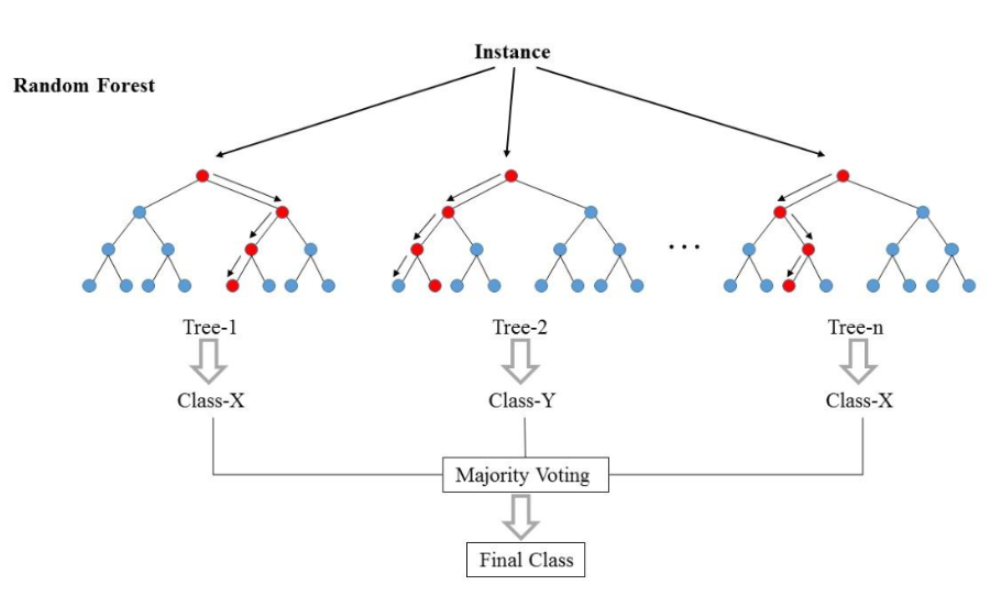

- 다수의 결정트리를 사용해서 성능을 올린 앙상블 알고리즘의 하나
    - 학습데이터를 샘플링해서 다수의 결정트리를 생성하고 이를 기반으로 다수결로 결과를 결정하는 방식
    - 다수의 결정트리를 만드는데서 랜덤포레스트라고 부른다.
- 처리속도가 빠르며 분류 성능도 높은 모델로 알려져 있다.   
- 랜덤포레스트의 절차
    - 묶을 결정트리 개수를 하이퍼파라미터로 받는다.
    - 랜덤 포레스트를 구성하는 모든 결정트리가 서로 다르도록 만든다.
        - 각 트리는 부트스트랩 샘플링(중복을 허용하면서 랜덤하게 샘플링하는 방식)으로 데이터셋을 준비한다. (총데이터의 수는 원래 데이터셋과 동일 하지만 일부는 누락되고 일부는 중복되 있다.)
        - 각 트리는 전체 피처중 일부의 피처만 랜덤하게 가지게 된다.
    - 각 트리별로 예측결과를 내고 분류의 경우 그 예측을 모아 다수결 투표로 클래스 결과를 낸다. 
    - 회귀의 경우는 예측 결과의 평균을 낸다.

- 중요 하이퍼파라미터
    - n_estimators
        - tree의 개수
        - 시간과 메모리가 허용하는 범위에서 클수록 좋다. 
    - max_feature
        - 각 트리에서 선택할 feature의 개수
        - 클수록 각 트리간의 feature 차이가 없어지고 작을 수록 차이가 많이 나게 된다.
    - max_depth
        - 트리의 최대 깊이

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [5]:
pred_train = rf_model.predict(X_train)
pred_test = rf_model.predict(X_test)
print("Train정확도: ", accuracy_score(y_train, pred_train))
print("Test정확도: ", accuracy_score(y_test, pred_test))

print("Train auc:", roc_auc_score(y_train, pred_train))
print('Test auc:', roc_auc_score(y_test, pred_test))

Train정확도:  1.0
Test정확도:  0.958041958041958
Train auc: 1.0
Test auc: 0.9511530398322852


In [17]:
# 특성 중요도 조회
np.argmax(rf_model.feature_importances_)
cancer.feature_names[np.argmax(rf_model.feature_importances_)]

'worst perimeter'

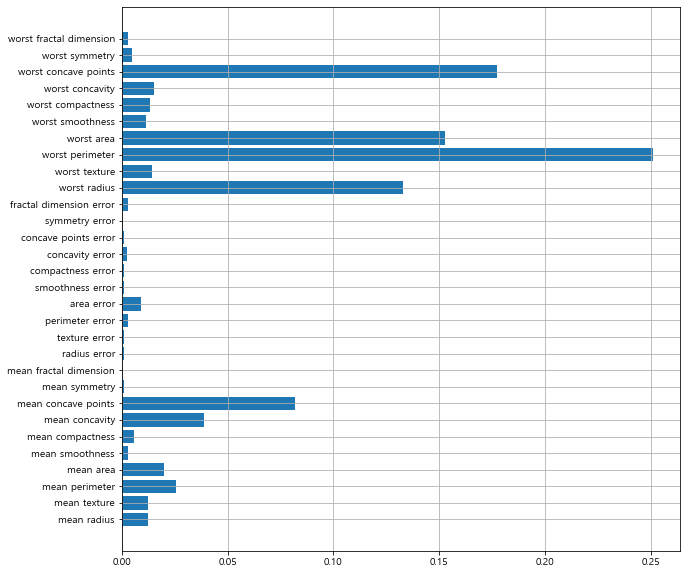

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.barh(range(len(cancer.feature_names)), rf_model.feature_importances_)
plt.yticks(range(len(cancer.feature_names)), cancer.feature_names)
plt.show()

In [11]:
# 생성한 트리들 정보
#rf_model.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=10, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=197682918, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=10, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1173956683, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                        max_features=10, max_leaf_nodes=None,
                        min_impurity_de